signed_adder [ar,br] -> [ar, br(br+ar)] ar:A(4,0), br:B(4,0), cr:tmp0


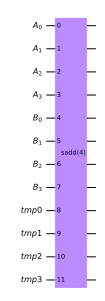

In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
import crsq.ast as ast

qra = QuantumRegister(4, 'A')
qrb = QuantumRegister(4, 'B')
qc = QuantumCircuit(qra, qrb)
scope = ast.new_scope(qc)
x1 = scope.register(qra)
y1 = scope.register(qrb)
y1 += x1
scope.build_circuit()
qc.draw(scale=0.5)

signed_adder [ar,br] -> [ar, br(br+ar)] ar:b(2,0), br:a(2,0), cr:tmp0
signed_adder [ar,br] -> [ar, br(br+ar)] ar:d(2,0), br:c(2,0), cr:tmp1


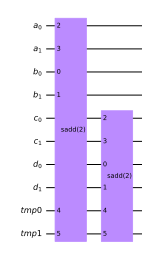

In [2]:
import crsq.ast as ast

x1 = QuantumRegister(2, 'a')
y1 = QuantumRegister(2, 'b')
x2 = QuantumRegister(2, 'c')
y2 = QuantumRegister(2, 'd')
qc = QuantumCircuit(x1, y1, x2, y2)
scope = ast.new_scope(qc)
x1 = scope.register(x1)
y1 = scope.register(y1)
x2 = scope.register(x2)
y2 = scope.register(y2)
x1 += y1
x2 += y2
scope.build_circuit()
qc.draw(scale=0.5)

signed_subtractor [ar,br] -> [ar, br(br-ar)] ar:b(3,0), br:a(3,0), cr:tmp0
signed_subtractor [ar,br] -> [ar, br(br-ar)] ar:d(3,0), br:b(3,0), cr:tmp1
signed_square ar:a(3,0), cr1:c0, cr2:c1, dr:d0(6,0)
signed_square ar:b(3,0), cr1:c2, cr2:c3, dr:d1(6,0)
signed_adder [ar,br] -> [ar, br(br+ar)] ar:d1(6,0), br:d0(6,0), cr:tmp2
square_root zr:d0(6,0), rr:r0(3,0), wr:w0, cr:c4


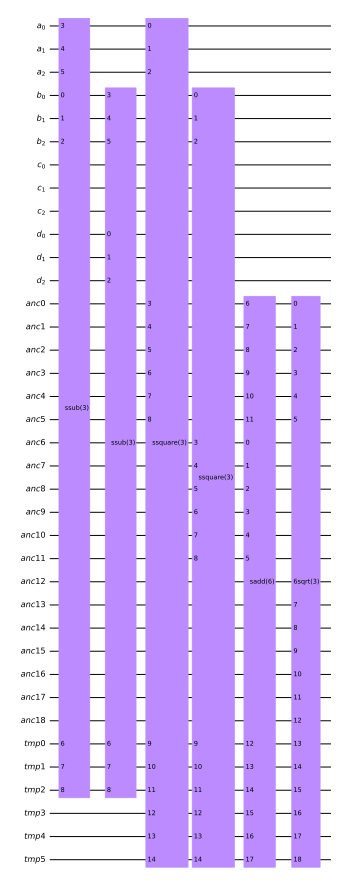

In [3]:
rx1 = QuantumRegister(3, 'a')
ry1 = QuantumRegister(3, 'b')
rx2 = QuantumRegister(3, 'c')
ry2 = QuantumRegister(3, 'd')
qc = QuantumCircuit(rx1, ry1, rx2, ry2)
scope = ast.new_scope(qc)
x1 = scope.register(rx1)
y1 = scope.register(ry1)
x2 = scope.register(rx2)
y2 = scope.register(ry2)

x1 -= y1
y1 -= y2
dx2 = scope.square(x1)
dy2 = scope.square(y1)
dx2 += dy2
r = scope.square_root(dx2)
scope.build_circuit()
qc.draw(scale=0.5)

In [4]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
import crsq.ast as ast

cpool = QuantumRegister(12,"tmp")
x1 = QuantumRegister(3,"x1")
y1 = QuantumRegister(3,"y1")
x2 = QuantumRegister(3,"x2")
y2 = QuantumRegister(3,"y2")
qc = QuantumCircuit(cpool,x1,y1,x2,y2)
scope = ast.new_scope(qc)
scope.set_work_pool_register(cpool)
rx1 = scope.register(x1)
ry1 = scope.register(y1)
rx2 = scope.register(x2)
ry2 = scope.register(y2)
rx1 -= rx2
ry1 -= ry2
sqx = scope.square(rx1)
sqy = scope.square(ry1)
sx = QuantumRegister(6, "sqx")
sy = QuantumRegister(6, "sqy")
qc.add_register(sx, sy)
sqx.replace_register(sx)
sqy.replace_register(sy)
sqx += sqy
sqrr = scope.square_root(sqx)
rr = QuantumRegister(3, "rr")
qc.add_register(rr)
sqrr.replace_register(rr)
scope.build_circuit()
qc.x(cpool[0])
scope.build_inverse_circuit()
scope.close()
qc.draw(scale=0.5)


AttributeError: '_ScopeImp' object has no attribute 'set_work_pool_register'